In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from read_sort import read_sort_main

FILES = {"data/ecoli_100Kb_reads_5x.fasta":"data/headerless/ecoli_100Kb_reads_5x.fasta.headerless.gz",
        "data/ecoli_100Kb_reads_10x.fasta":"data/headerless/ecoli_100Kb_reads_10x.fasta.headerless.gz",
        "data/ecoli_100Kb_reads_20x.fasta":"data/headerless/ecoli_100Kb_reads_20x.fasta.headerless.gz",
        "data/ecoli_100Kb_reads_40x.fasta":"data/headerless/ecoli_100Kb_reads_40x.fasta.headerless.gz",
        "data/ecoli_100Kb_reads_80x.fasta":"data/headerless/ecoli_100Kb_reads_80x.fasta.headerless.gz",
        "data/ecoli_100Kb_reads_120x.fasta":"data/headerless/ecoli_100Kb_reads_120x.fasta.headerless.gz",
        "data/humch1_1Mb_reads_5x.fasta":"data/headerless/humch1_1Mb_reads_5x.fasta.headerless.gz",
        "data/humch1_1Mb_reads_10x.fasta":"data/headerless/humch1_1Mb_reads_10x.fasta.headerless.gz",
        "data/humch1_1Mb_reads_20x.fasta":"data/headerless/humch1_1Mb_reads_20x.fasta.headerless.gz",
        "data/humch1_1Mb_reads_40x.fasta":"data/headerless/humch1_1Mb_reads_40x.fasta.headerless.gz",
        "data/humch1_1Mb_reads_80x.fasta":"data/headerless/humch1_1Mb_reads_80x.fasta.headerless.gz",
        "data/humch1_1Mb_reads_120x.fasta":"data/headerless/humch1_1Mb_reads_120x.fasta.headerless.gz",
        "data/metagenomic_sample.fasta":"data/headerless/metagenomic_sample.fasta.headerless.gz",}

file_size = ["ecoli_5X","ecoli_10X","ecoli_20X","ecoli_40X","ecoli_80X","ecoli_120X","mix","HChr1_5X","HChr1_10X","HChr1_20X","HChr1_40X","HChr1_80X","HChr1_120X"]

KMER_SIZE = [2,3,4,5,6,7,8,9]
INT_NUM = [2,3,4,5,6,7,8]


### Metrics :

In [3]:

rate_by_file = []
time_by_file = []
for file in FILES:
    kwargs = {"infile" : file,
    "compare_to":FILES[file],
    "delete" : True,
    "method" : "kmer_sort"}
    log = read_sort_main(**kwargs)
    rate_by_file.append(float(log["rate"]))
    time_by_file.append(log["time"])

Function 'sort_by_kmer' executed in 1.6934s
Function 'sort_by_kmer' executed in 2.2165s
Function 'sort_by_kmer' executed in 3.1657s
Function 'sort_by_kmer' executed in 5.6713s
Function 'sort_by_kmer' executed in 9.6382s
Function 'sort_by_kmer' executed in 15.7126s
Function 'sort_by_kmer' executed in 6.7205s


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'data/headerless/humch1_1Mb_reads_5x_headerless.fasta.gz'

In [18]:
reads = [5000,10000,20000,40000,80000,120000,50000,100000,200000,400000,800000,1200000,877178]

df_e = pd.DataFrame(pd.read_csv("log/kmer/kmer_log_ecoli.csv",sep=";"))
df_e["rate"] = rate_by_file[0:6]
df_e["time"] = time_by_file[0:6]
df_e["reads"] = reads[0:6]

df_h = pd.DataFrame(pd.read_csv("log/kmer/kmer_log_human.csv",sep=";"))
df_h["rate"] = rate_by_file[6:12]
df_h["time"] = time_by_file[6:12]
df_h["reads"] = reads[6:12]
df_m = pd.DataFrame(pd.read_csv("log/kmer/kmer_log_mix.csv",sep=";"))
df_m["rate"] = [rate_by_file[12]]
df_m["time"] = [time_by_file[12]]
df_m["reads"] = [reads[12]]

df_e.to_csv("log/kmer/kmer_log_ecoli.csv",sep=";",index=False,columns=["reads","rate","time"])
df_h.to_csv("log/kmer/kmer_log_human.csv",sep=";",index=False,columns=["reads","rate","time"])
df_m.to_csv("log/kmer/kmer_log_mix.csv",sep=";",index=False,columns=["reads","rate","time"])

Text(0.5, 1.0, 'kmer - Compression ratio vs number of reads')

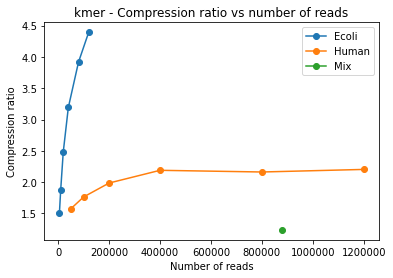

In [19]:
df_e = pd.DataFrame(pd.read_csv("log/kmer/kmer_log_ecoli.csv",sep=";"))
df_h = pd.DataFrame(pd.read_csv("log/kmer/kmer_log_human.csv",sep=";"))
df_m = pd.DataFrame(pd.read_csv("log/kmer/kmer_log_mix.csv",sep=";"))
plt.plot(df_e['reads'], df_e['rate'],  'o-')
plt.plot(df_h['reads'], df_h['rate'],  'o-')
plt.plot(df_m['reads'], df_m['rate'],  'o-')

plt.ticklabel_format(style='plain')
plt.xlabel('Number of reads')
plt.ylabel('Compression ratio')
plt.legend(['Ecoli', 'Human', 'Mix'])
plt.title('kmer - Compression ratio vs number of reads')

Text(0.5, 1.0, 'kmer - Execution time vs number of reads')

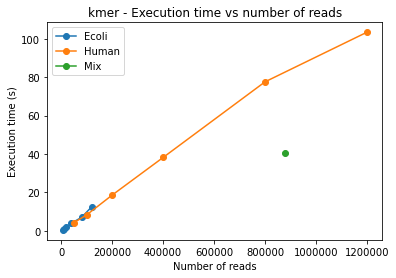

In [20]:
plt.plot(df_e['reads'], df_e['time'],  'o-')
plt.plot(df_h['reads'], df_h['time'],  'o-')
plt.plot(df_m['reads'], df_m['time'],  'o-')

plt.ticklabel_format(style='plain')
plt.xlabel('Number of reads')
plt.ylabel('Execution time (s)')
plt.legend(['Ecoli', 'Human', 'Mix'])
plt.title('kmer - Execution time vs number of reads')

Text(0.5, 1.0, 'kmer - Max memory used vs number of reads')

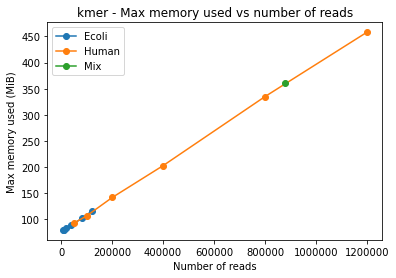

In [22]:
df_e = pd.DataFrame(pd.read_csv("log/kmer/kmer_log_ecoli.csv",sep=";"))
df_h = pd.DataFrame(pd.read_csv("log/kmer/kmer_log_human.csv",sep=";"))
df_m = pd.DataFrame(pd.read_csv("log/kmer/kmer_log_mix.csv",sep=";"))
df_e['ram'] = [80,80,84,89,102,116]
df_h['ram'] = [93,107,142,203,335,458]
df_m['ram'] = [360]

plt.plot(df_e['reads'], df_e['ram'],  'o-')
plt.plot(df_h['reads'], df_h['ram'],  'o-')
plt.plot(df_m['reads'], df_m['ram'],  'o-')

plt.ticklabel_format(style='plain')
plt.xlabel('Number of reads')
plt.ylabel('Max memory used (MiB)')
plt.legend(['Ecoli', 'Human', 'Mix'])
plt.title('kmer - Max memory used vs number of reads')

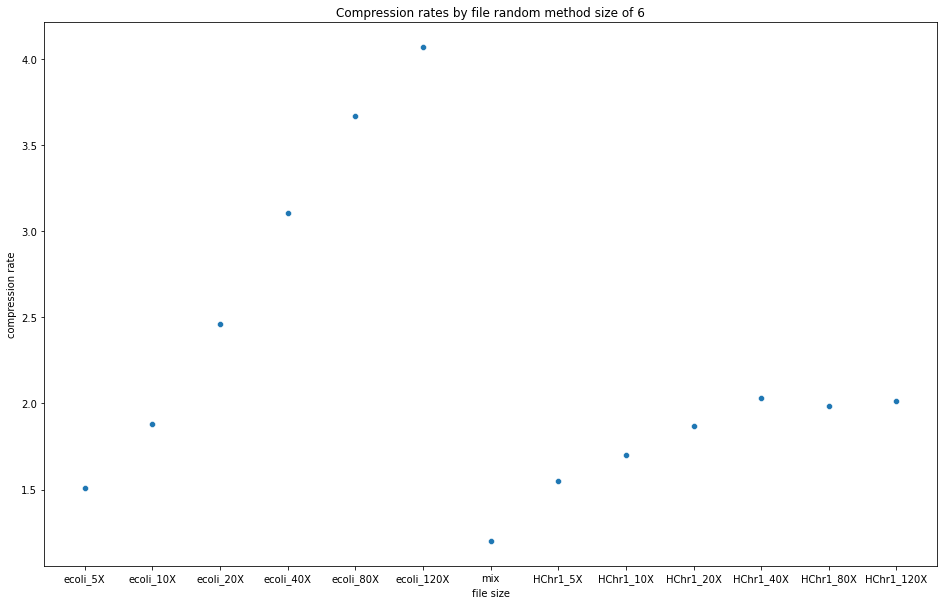

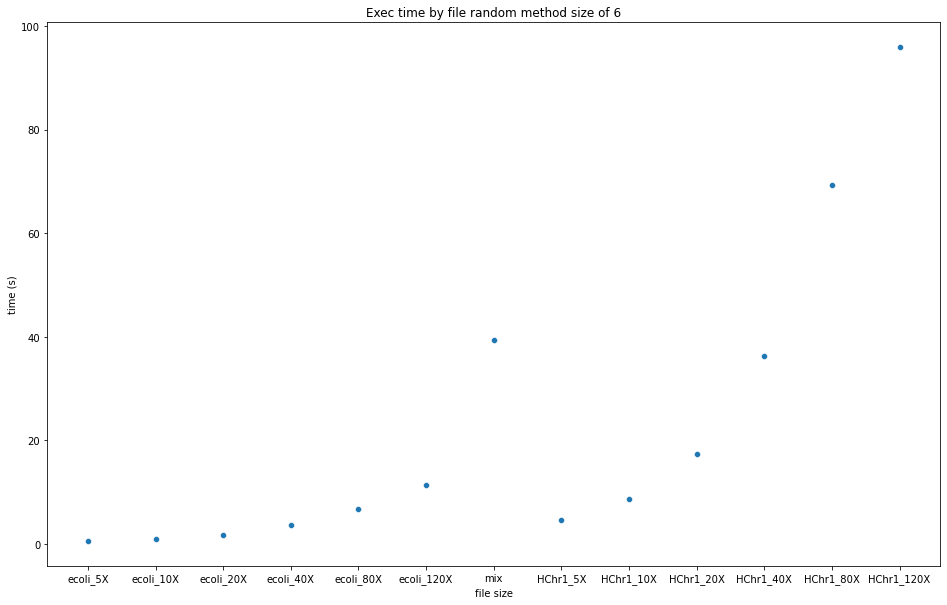

In [3]:
plt.figure(figsize=(16,10))
size_comparisons= sns.scatterplot(
    x=file_size, y=rate_by_file,
    legend="brief",
).set(title="compressed file size rate between sort and unsort by file"
      ,xlabel="file size", ylabel="rate")


plt.figure(figsize=(16,10))
size_comparisons= sns.scatterplot(
    x=file_size, y=time_by_file,
    legend="brief",
).set(title="Exec time by file"
      ,xlabel="file size", ylabel="time (s)")

In [3]:
rate_by_size = []
time_by_size = []

for size in KMER_SIZE:
    kwargs = {"infile" : "data/ecoli_100Kb_reads_120x.fasta",
    "compare_to":"data/headerless/ecoli_100Kb_reads_120x.fasta.headerless.gz",
    "delete" : True,
    "method" : "kmer_sort",
    "size" : size}
    log = read_sort_main(**kwargs)
    rate_by_size.append(float(log["rate"]))
    time_by_size.append(log["time"])

Function 'sort_by_kmer' executed in 1.0047s
Function 'sort_by_kmer' executed in 0.7113s
Function 'sort_by_kmer' executed in 1.1418s
Function 'sort_by_kmer' executed in 2.8986s
Function 'sort_by_kmer' executed in 10.5419s
Function 'sort_by_kmer' executed in 32.8980s
reaching 1000
Function 'sort_by_kmer' executed in 91.6456s
reaching 1000
Function 'sort_by_kmer' executed in 174.6109s
reaching 1000
Function 'sort_by_kmer' executed in 215.0600s


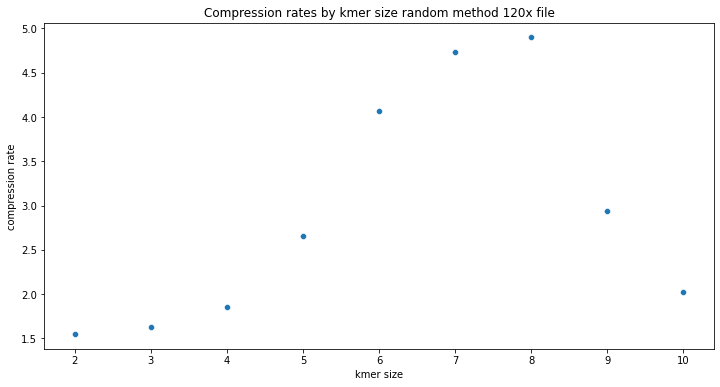

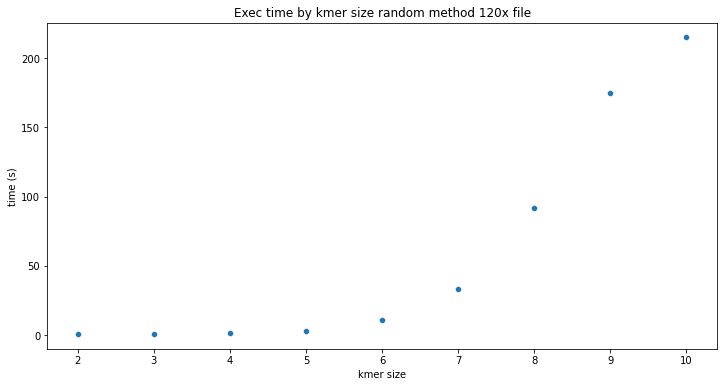

In [24]:
plt.figure(figsize=(12,6))
size_comparisons= sns.scatterplot(
    x=KMER_SIZE, y=rate_by_size,
    legend="brief",
).set(title="Compression rates by kmer size random method 120x file"
      ,xlabel="kmer size", ylabel="compression rate")


plt.figure(figsize=(12,6))
size_comparisons= sns.scatterplot(
    x=KMER_SIZE, y=time_by_size,
    legend="brief",
).set(title="Exec time by kmer size random method 120x file"
      ,xlabel="kmer size", ylabel="time (s)")

In [10]:
rate_by_cut = []
time_by_cut = []

for inter in INT_NUM:
    kwargs = {"infile" : "data/ecoli_100Kb_reads_120x.fasta",
    "compare_to":"data/headerless/ecoli_100Kb_reads_120x.fasta.headerless.gz",
    "delete" : True,
    "method" : "kmer_sort",
    "intervals_number":inter}
    log = read_sort_main(**kwargs)
    rate_by_cut.append(float(log["rate"]))
    time_by_cut.append(log["time"])


Function 'sort_by_kmer' executed in 9.8483s
Function 'sort_by_kmer' executed in 9.6642s
Function 'sort_by_kmer' executed in 9.6502s
Function 'sort_by_kmer' executed in 9.7387s
Function 'sort_by_kmer' executed in 9.6927s
Function 'sort_by_kmer' executed in 10.0570s
Function 'sort_by_kmer' executed in 9.6810s
Function 'sort_by_kmer' executed in 9.7220s
Function 'sort_by_kmer' executed in 9.6365s
Function 'sort_by_kmer' executed in 9.6403s
Function 'sort_by_kmer' executed in 9.7560s
Function 'sort_by_kmer' executed in 9.6833s
Function 'sort_by_kmer' executed in 9.5996s
Function 'sort_by_kmer' executed in 9.7229s


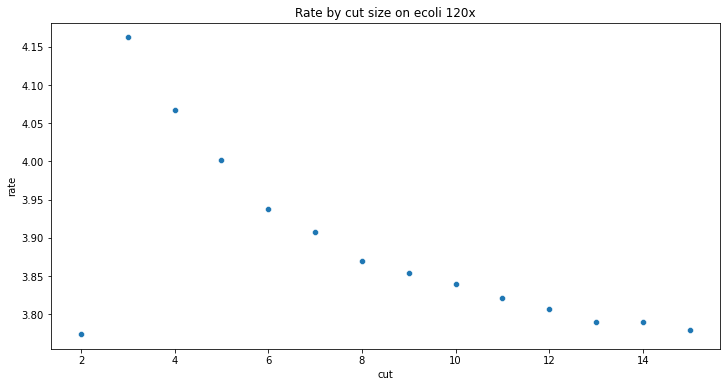

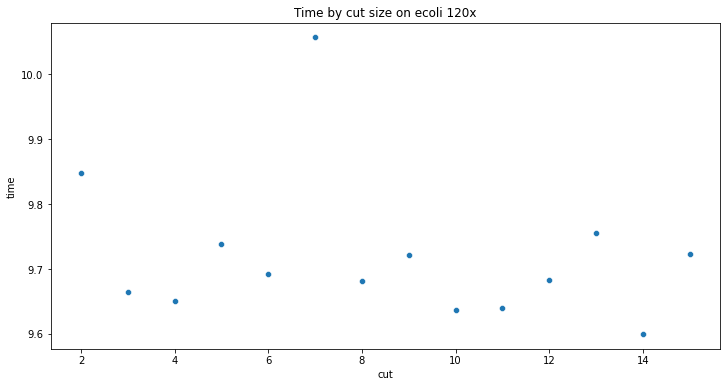

In [25]:
plt.figure(figsize=(12,6))
size_comparisons= sns.scatterplot(
    x=INT_NUM, y=rate_by_cut,
    legend="brief",
).set(title="Rate by cut size on ecoli 120x"
      ,xlabel="cut", ylabel="rate")

plt.figure(figsize=(12,6))
size_comparisons= sns.scatterplot(
    x=INT_NUM, y=time_by_cut,
    legend="brief",
).set(title="Time by cut size on ecoli 120x"
      ,xlabel="cut", ylabel="time")

In [17]:
SIZE_INT = [(a,b) for a in KMER_SIZE for b in INT_NUM]
random_rate_by_size_and_cut = []
random_time_by_size_and_cut = []
for size_cut in SIZE_INT:
    print(size_cut)
    kwargs = {"infile" : "data/ecoli_100Kb_reads_120x.fasta",
    "compare_to":"data/headerless/ecoli_100Kb_reads_120x.fasta.headerless.gz",
    "delete" : True,
    "method" : "kmer_sort",
    "intervals_number":size_cut[1],
    "size" : size_cut[0]}
    log = read_sort_main(**kwargs)
    random_rate_by_size_and_cut.append(float(log["rate"]))
    random_time_by_size_and_cut.append(log["time"])

(2, 2)
Function 'sort_by_kmer' executed in 0.9282s
(2, 3)
Function 'sort_by_kmer' executed in 0.8946s
(2, 4)
Function 'sort_by_kmer' executed in 0.9071s
(2, 5)
Function 'sort_by_kmer' executed in 0.9130s
(2, 6)
Function 'sort_by_kmer' executed in 0.9236s
(2, 7)
Function 'sort_by_kmer' executed in 0.9273s
(2, 8)
Function 'sort_by_kmer' executed in 0.9328s
(2, 9)
Function 'sort_by_kmer' executed in 0.9438s
(2, 10)
Function 'sort_by_kmer' executed in 0.9362s
(2, 11)
Function 'sort_by_kmer' executed in 0.9468s
(2, 13)
Function 'sort_by_kmer' executed in 0.9458s
(2, 12)
Function 'sort_by_kmer' executed in 0.9535s
(2, 14)
Function 'sort_by_kmer' executed in 0.9431s
(2, 15)
Function 'sort_by_kmer' executed in 0.9548s
(3, 2)
Function 'sort_by_kmer' executed in 0.6803s
(3, 3)
Function 'sort_by_kmer' executed in 0.6888s
(3, 4)
Function 'sort_by_kmer' executed in 0.7032s
(3, 5)
Function 'sort_by_kmer' executed in 0.6979s
(3, 6)
Function 'sort_by_kmer' executed in 0.6971s
(3, 7)
Function 'sort_by_

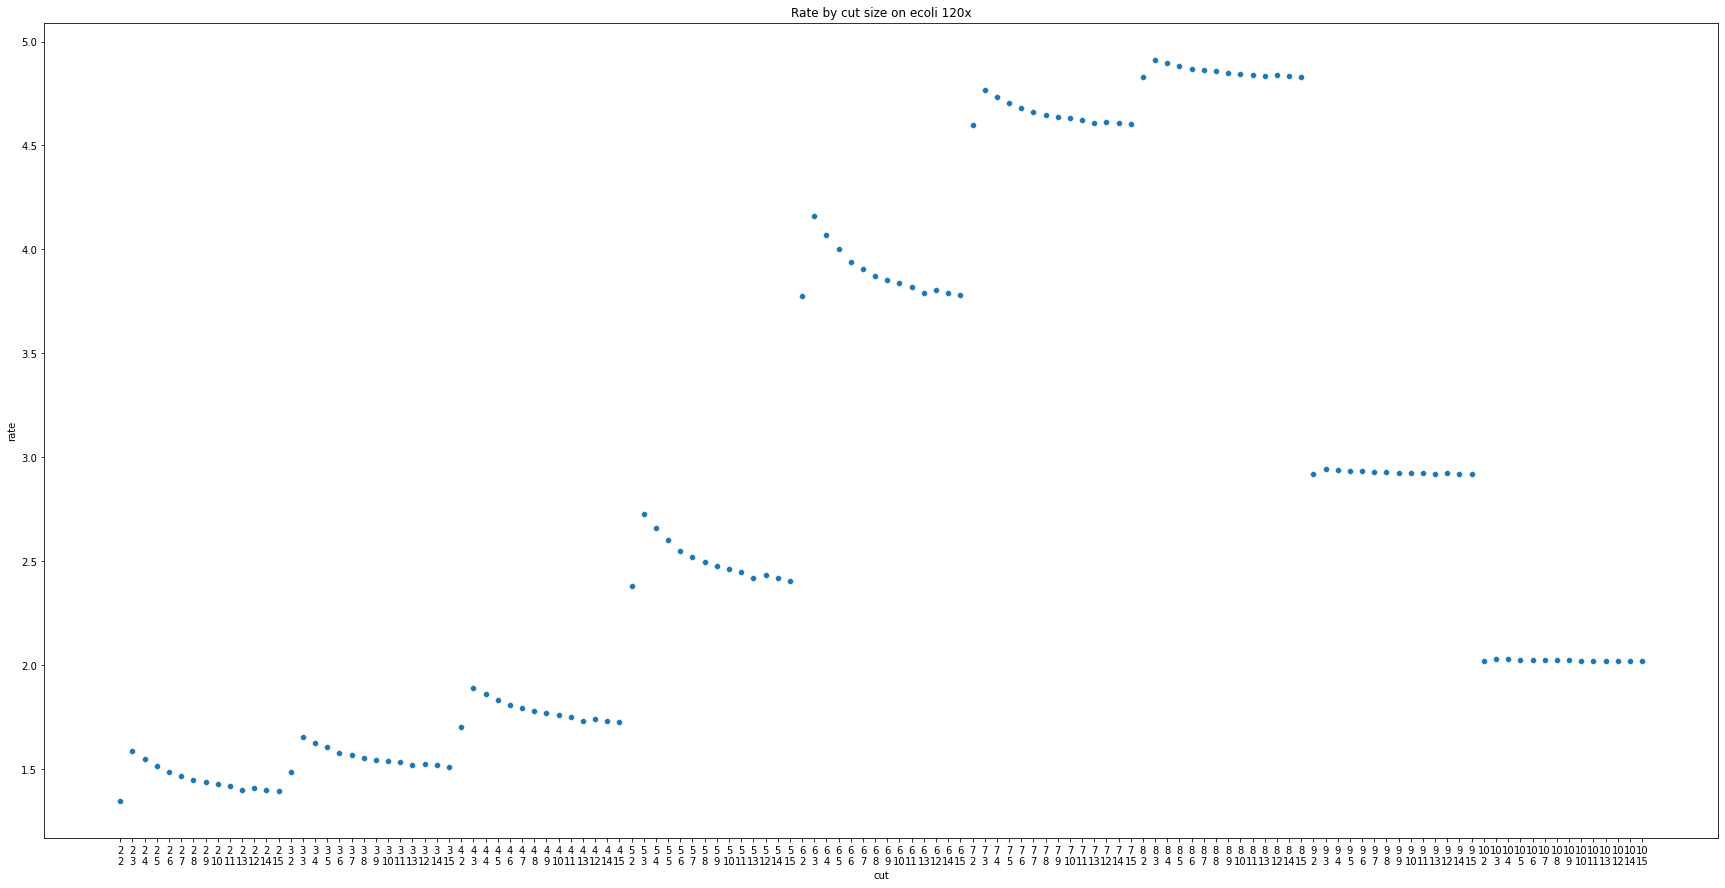

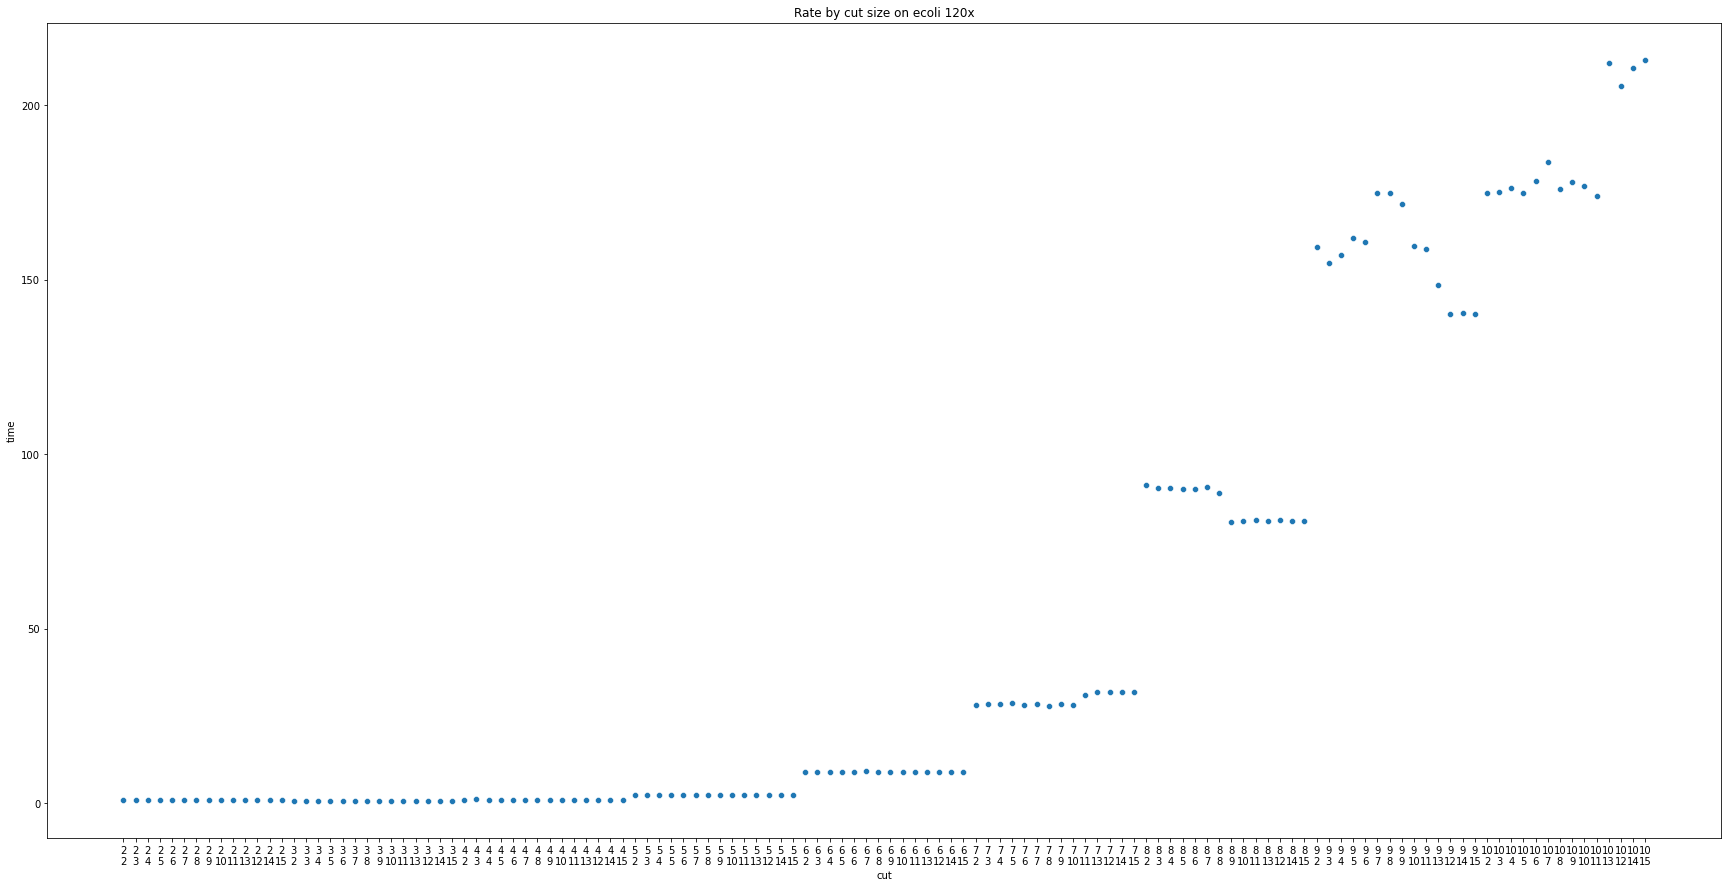

In [23]:
SIZE_CUT = [f"{a}\n{b}" for a in KMER_SIZE for b in INT_NUM]

plt.figure(figsize=(30,15))
size_comparisons= sns.scatterplot(
    x=SIZE_CUT, y=random_rate_by_size_and_cut,
    legend="brief",
).set(title="Rate by cut size on ecoli 120x"
      ,xlabel="cut", ylabel="rate")

plt.figure(figsize=(30,15))
size_comparisons= sns.scatterplot(
    x=SIZE_CUT, y=random_time_by_size_and_cut,
    legend="brief",
).set(title="Rate by cut size on ecoli 120x"
      ,xlabel="cut", ylabel="time")